# Applying various models to raw data and analyzing various metrics

In [164]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import numpy as np
import math
from sklearn.preprocessing import scale
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data = data.dropna()

In [4]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C


In [5]:
y = data.Survived

In [6]:
X = data.drop(['PassengerId','Survived','Name','Ticket','Cabin','Embarked'],axis = 1)

In [7]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare
1,1,female,38.0,1,0,71.2833
3,1,female,35.0,1,0,53.1000
6,1,male,54.0,0,0,51.8625
10,3,female,4.0,1,1,16.7000
11,1,female,58.0,0,0,26.5500
21,2,male,34.0,0,0,13.0000
23,1,male,28.0,0,0,35.5000
27,1,male,19.0,3,2,263.0000
52,1,female,49.0,1,0,76.7292
54,1,male,65.0,0,1,61.9792


In [9]:
encoder = LabelEncoder()
X.Sex = encoder.fit_transform(X.Sex)

In [8]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare
1,1,female,38.0,1,0,71.2833
3,1,female,35.0,1,0,53.1000
6,1,male,54.0,0,0,51.8625
10,3,female,4.0,1,1,16.7000
11,1,female,58.0,0,0,26.5500
21,2,male,34.0,0,0,13.0000
23,1,male,28.0,0,0,35.5000
27,1,male,19.0,3,2,263.0000
52,1,female,49.0,1,0,76.7292
54,1,male,65.0,0,1,61.9792


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 42)

### logistic regression

In [11]:
log = LogisticRegression()
log.fit(X_train,y_train)
log_train_score = log.score(X_train,y_train)
log_test_score = log.score(X_test,y_test)
y_pred_log = log.predict(X_test)
print("train score",log_train_score)
print("test score",log_test_score)
acc_log = accuracy_score(y_test,y_pred_log)
prec_log = precision_score(y_test,y_pred_log)
rec_log = recall_score(y_test,y_pred_log)
fscore_log = f1_score(y_test,y_pred_log)
print("accuracy",acc_log)
print("precision",prec_log)
print("Recall",rec_log)
print("Fscore",fscore_log)

train score 0.765625
test score 0.6363636363636364
accuracy 0.6363636363636364
precision 0.7777777777777778
Recall 0.6
Fscore 0.6774193548387097


### KNeighboursClassifier

In [12]:
knc = KNeighborsClassifier()
knc.fit(X_train,y_train)
knc_train_score = knc.score(X_train,y_train)
knc_test_score = knc.score(X_test,y_test)
print("train score",knc_train_score)
print("test score",knc_test_score)
y_pred_knc = knc.predict(X_test)
acc_knc = accuracy_score(y_test,y_pred_knc)
prec_knc = precision_score(y_test,y_pred_knc)
rec_knc = recall_score(y_test,y_pred_knc)
fscore_knc = f1_score(y_test,y_pred_knc)
print("accuracy",acc_knc)
print("precision",prec_knc)
print("Recall",rec_knc)
print("Fscore",fscore_knc)

train score 0.71875
test score 0.6545454545454545
accuracy 0.6545454545454545
precision 0.6739130434782609
Recall 0.8857142857142857
Fscore 0.7654320987654321


### Decision tree

In [13]:
dtree = tree.DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree_train_score = dtree.score(X_train,y_train)
dtree_test_score = dtree.score(X_test,y_test)
print("train score",dtree_train_score)
print("test score",dtree_test_score)

y_pred_dtree = dtree.predict(X_test)
acc_dtree = accuracy_score(y_test,y_pred_dtree)
prec_dtree = precision_score(y_test,y_pred_dtree)
rec_dtree = recall_score(y_test,y_pred_dtree)
fscore_dtree = f1_score(y_test,y_pred_dtree)
print("accuracy",acc_dtree)
print("precision",prec_dtree)
print("Recall",rec_dtree)
print("Fscore",fscore_dtree)

train score 1.0
test score 0.7272727272727273
accuracy 0.7272727272727273
precision 0.8125
Recall 0.7428571428571429
Fscore 0.7761194029850748


### Linear SVM

In [14]:
svc = SVC()
svc.fit(X_train,y_train)
svc_train_score = svc.score(X_train,y_train)
svc_test_score = svc.score(X_test,y_test)
print("train score",svc_train_score)
print("test score",svc_test_score)

y_pred_svc = svc.predict(X_test)
acc_svc = accuracy_score(y_test,y_pred_svc)
prec_svc = precision_score(y_test,y_pred_svc)
rec_svc = recall_score(y_test,y_pred_svc)
fscore_svc = f1_score(y_test,y_pred_svc)
print("accuracy",acc_svc)
print("precision",prec_svc)
print("Recall",rec_svc)
print("Fscore",fscore_svc)

train score 0.9609375
test score 0.6
accuracy 0.6
precision 0.6326530612244898
Recall 0.8857142857142857
Fscore 0.7380952380952381


### Random forest

In [16]:
forest = RandomForestClassifier()
forest.fit(X_train,y_train)
forest_train_score = forest.score(X_train,y_train)
forest_test_score = forest.score(X_test,y_test)
print("train score",forest_train_score)
print("test score",forest_test_score)

y_pred_forest = forest.predict(X_test)
acc_forest = accuracy_score(y_test,y_pred_forest)
prec_forest = precision_score(y_test,y_pred_forest)
rec_forest = recall_score(y_test,y_pred_forest)
fscore_forest = f1_score(y_test,y_pred_forest)
print("accuracy",acc_forest)
print("precision",prec_forest)
print("Recall",rec_forest)
print("Fscore",fscore_forest)

train score 0.9921875
test score 0.6909090909090909
accuracy 0.6909090909090909
precision 0.78125
Recall 0.7142857142857143
Fscore 0.7462686567164178


<BarContainer object of 5 artists>

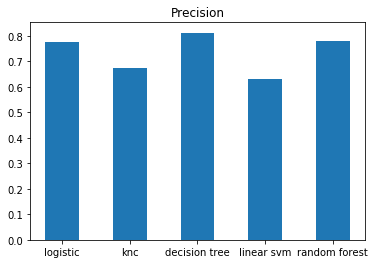

In [17]:
labels = ['logistic','knc','decision tree','linear svm','random forest']
yy = [prec_log,prec_knc,prec_dtree,prec_svc,prec_forest]
# xx = [1,2]
# plt.xticks(xx,labels)
plt.title('Precision')
plt.bar(labels,yy,width=0.5)

<BarContainer object of 5 artists>

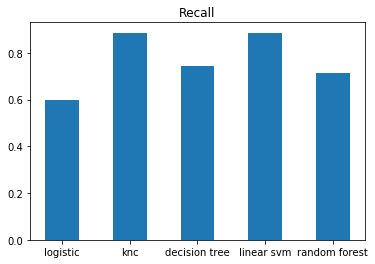

In [18]:
labels = ['logistic','knc','decision tree','linear svm','random forest']
yy = [rec_log,rec_knc,rec_dtree,rec_svc,rec_forest]
# xx = [1,2]
# plt.xticks(xx,labels)
plt.title('Recall')
plt.bar(labels,yy,width=0.5)

<BarContainer object of 5 artists>

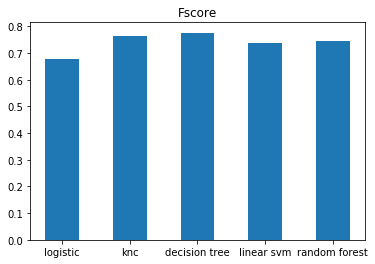

In [19]:
labels = ['logistic','knc','decision tree','linear svm','random forest']
yy = [fscore_log,fscore_knc,fscore_dtree,fscore_svc,fscore_forest]
# xx = [1,2]
# plt.xticks(xx,labels)
plt.title('Fscore')
plt.bar(labels,yy,width=0.5)

# Applying data preprocessing techniques and feature engineering

In [112]:
data = pd.read_csv('train.csv')

In [113]:
data = data.drop(['Embarked','Ticket','PassengerId'],axis = 1)

In [114]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN
5,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,NaN
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,E46
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,NaN
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,NaN
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,NaN


## CATEGORICAL DATA

### making data.Sex binary

In [115]:
cat_data = data.Sex

In [116]:
lb = LabelBinarizer()
cat_data_one_hot = lb.fit_transform(cat_data)

In [117]:
cat_data_one_hot

array([[1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
    

### retrieving keywords from data.Name

In [118]:
cat_data2 = data.Name
cat_data2

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
6                                McCarthy, Mr. Timothy J
7                         Palsson, Master. Gosta Leonard
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
12                        Saundercock, Mr. William Henry
13                           Andersson, Mr. Anders Johan
14                  Vestrom, Miss. Hulda Amanda Adolfina
15                      Hewlett, Mrs. (Mary D Kingcome) 
16                                  Rice, Master. Eugene
17                          Wil

In [119]:
cat_data2_new = []
for i in range(0,len(cat_data2)):
    new_cat = (cat_data2[i][cat_data2[i].find(',')+1:cat_data2[i].find('.')]).strip()
    cat_data2_new.append(new_cat)

                

In [120]:
cat_data2_new

['Mr',
 'Mrs',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Master',
 'Mrs',
 'Mrs',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mrs',
 'Master',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Don',
 'Mrs',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Miss',
 'Mrs',
 'Mrs',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mrs',
 'Master',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Master',
 'Mr',
 'Miss',
 'Mr',
 'Master',
 'Mr',
 'Master',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Master',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Master',
 'Mr',
 

In [121]:
cat_data2_new_one_hot = lb.fit_transform(cat_data2_new)
print(cat_data2_new_one_hot)
print(cat_data2_new_one_hot.shape)
print(len(lb.classes_))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(891, 17)
17


In [148]:
cat_data3_new = []
cat_data3 = data['Cabin']
# for i in range(0,len(cat_data3)):
#     if(cat_data3[i]=='nan'):
#         cat_data3_new.append(0)
#     else:
#         cat_data3_new.append(1)
# print(cat_data3[0]==nan)
# print(cat_data3_new)
cat_data3_new = pd.isnull(data['Cabin'])
cat_data3_new_one_hot = lb.fit_transform(cat_data3_new)
print(cat_data3_new_one_hot)
print(data.Cabin)

[[1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]


In [149]:
cat_data_merged = np.hstack((cat_data2_new_one_hot,cat_data_one_hot))
cat_data_merged = np.hstack((cat_data_merged,cat_data3_new_one_hot))
print(cat_data_merged)
print(cat_data_merged.shape)

[[0 0 0 ... 0 1 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 1]]
(891, 19)


## NUMERICAL DATA

In [174]:
num_data = data._get_numeric_data()
y = num_data.Survived
num_data = num_data.drop('Survived',axis = 1)
print(num_data)
print(y)

     Pclass   Age  SibSp  Parch      Fare
0         3  22.0      1      0    7.2500
1         1  38.0      1      0   71.2833
2         3  26.0      0      0    7.9250
3         1  35.0      1      0   53.1000
4         3  35.0      0      0    8.0500
5         3   NaN      0      0    8.4583
6         1  54.0      0      0   51.8625
7         3   2.0      3      1   21.0750
8         3  27.0      0      2   11.1333
9         2  14.0      1      0   30.0708
10        3   4.0      1      1   16.7000
11        1  58.0      0      0   26.5500
12        3  20.0      0      0    8.0500
13        3  39.0      1      5   31.2750
14        3  14.0      0      0    7.8542
15        2  55.0      0      0   16.0000
16        3   2.0      4      1   29.1250
17        2   NaN      0      0   13.0000
18        3  31.0      1      0   18.0000
19        3   NaN      0      0    7.2250
20        2  35.0      0      0   26.0000
21        2  34.0      0      0   13.0000
22        3  15.0      0      0   

### replacing NaN values with median of that column

In [175]:
imputer = Imputer(strategy='median')
num_data_new = imputer.fit_transform(num_data)

In [176]:
num_data_new

array([[ 3.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 3.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 3.    , 28.    ,  1.    ,  2.    , 23.45  ],
       [ 1.    , 26.    ,  0.    ,  0.    , 30.    ],
       [ 3.    , 32.    ,  0.    ,  0.    ,  7.75  ]])

### scaling the data

In [177]:
num_data_new_scaled = scale(num_data_new)
print(num_data_new_scaled)
print(num_data_new_scaled.shape)

[[ 0.82737724 -0.56573646  0.43279337 -0.47367361 -0.50244517]
 [-1.56610693  0.66386103  0.43279337 -0.47367361  0.78684529]
 [ 0.82737724 -0.25833709 -0.4745452  -0.47367361 -0.48885426]
 ...
 [ 0.82737724 -0.1046374   0.43279337  2.00893337 -0.17626324]
 [-1.56610693 -0.25833709 -0.4745452  -0.47367361 -0.04438104]
 [ 0.82737724  0.20276197 -0.4745452  -0.47367361 -0.49237783]]
(891, 5)


## merging categorical and numerical

In [178]:
merged_data = np.hstack((cat_data_merged,num_data_new_scaled))
print(merged_data)
print(merged_data.shape)

[[ 0.          0.          0.         ...  0.43279337 -0.47367361
  -0.50244517]
 [ 0.          0.          0.         ...  0.43279337 -0.47367361
   0.78684529]
 [ 0.          0.          0.         ... -0.4745452  -0.47367361
  -0.48885426]
 ...
 [ 0.          0.          0.         ...  0.43279337  2.00893337
  -0.17626324]
 [ 0.          0.          0.         ... -0.4745452  -0.47367361
  -0.04438104]
 [ 0.          0.          0.         ... -0.4745452  -0.47367361
  -0.49237783]]
(891, 24)


## APPLYING THE MODELS AGAIN ON THE PREPROCESSED DATA

In [179]:
X_train, X_test, y_train, y_test = train_test_split(merged_data,y,test_size = 0.30, random_state = 42)

### Logistic regression

In [180]:
log = LogisticRegression()
log.fit(X_train,y_train)
log_train_score = log.score(X_train,y_train)
log_test_score = log.score(X_test,y_test)
y_pred_log = log.predict(X_test)
print("train score",log_train_score)
print("test score",log_test_score)
acc_log = accuracy_score(y_test,y_pred_log)
prec_log = precision_score(y_test,y_pred_log)
rec_log = recall_score(y_test,y_pred_log)
fscore_log = f1_score(y_test,y_pred_log)
print("accuracy",acc_log)
print("precision",prec_log)
print("Recall",rec_log)
print("Fscore",fscore_log)

train score 0.8378812199036918
test score 0.8097014925373134
accuracy 0.8097014925373134
precision 0.7884615384615384
Recall 0.7387387387387387
Fscore 0.7627906976744186


### KNeighboursClassifier

In [181]:
knc = KNeighborsClassifier()
knc.fit(X_train,y_train)
knc_train_score = knc.score(X_train,y_train)
knc_test_score = knc.score(X_test,y_test)
print("train score",knc_train_score)
print("test score",knc_test_score)
y_pred_knc = knc.predict(X_test)
acc_knc = accuracy_score(y_test,y_pred_knc)
prec_knc = precision_score(y_test,y_pred_knc)
rec_knc = recall_score(y_test,y_pred_knc)
fscore_knc = f1_score(y_test,y_pred_knc)
print("accuracy",acc_knc)
print("precision",prec_knc)
print("Recall",rec_knc)
print("Fscore",fscore_knc)

train score 0.8635634028892456
test score 0.7985074626865671
accuracy 0.7985074626865671
precision 0.8
Recall 0.6846846846846847
Fscore 0.737864077669903


### Decision Tree

In [182]:
dtree = tree.DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree_train_score = dtree.score(X_train,y_train)
dtree_test_score = dtree.score(X_test,y_test)
print("train score",dtree_train_score)
print("test score",dtree_test_score)

y_pred_dtree = dtree.predict(X_test)
acc_dtree = accuracy_score(y_test,y_pred_dtree)
prec_dtree = precision_score(y_test,y_pred_dtree)
rec_dtree = recall_score(y_test,y_pred_dtree)
fscore_dtree = f1_score(y_test,y_pred_dtree)
print("accuracy",acc_dtree)
print("precision",prec_dtree)
print("Recall",rec_dtree)
print("Fscore",fscore_dtree)

train score 0.9839486356340289
test score 0.75
accuracy 0.75
precision 0.7075471698113207
Recall 0.6756756756756757
Fscore 0.6912442396313364


### Linear SVM

In [183]:
svc = SVC()
svc.fit(X_train,y_train)
svc_train_score = svc.score(X_train,y_train)
svc_test_score = svc.score(X_test,y_test)
print("train score",svc_train_score)
print("test score",svc_test_score)

y_pred_svc = svc.predict(X_test)
acc_svc = accuracy_score(y_test,y_pred_svc)
prec_svc = precision_score(y_test,y_pred_svc)
rec_svc = recall_score(y_test,y_pred_svc)
fscore_svc = f1_score(y_test,y_pred_svc)
print("accuracy",acc_svc)
print("precision",prec_svc)
print("Recall",rec_svc)
print("Fscore",fscore_svc)

train score 0.8346709470304976
test score 0.835820895522388
accuracy 0.835820895522388
precision 0.8383838383838383
Recall 0.7477477477477478
Fscore 0.7904761904761904


### Random Forest

In [184]:
forest = RandomForestClassifier()
forest.fit(X_train,y_train)
forest_train_score = forest.score(X_train,y_train)
forest_test_score = forest.score(X_test,y_test)
print("train score",forest_train_score)
print("test score",forest_test_score)

y_pred_forest = forest.predict(X_test)
acc_forest = accuracy_score(y_test,y_pred_forest)
prec_forest = precision_score(y_test,y_pred_forest)
rec_forest = recall_score(y_test,y_pred_forest)
fscore_forest = f1_score(y_test,y_pred_forest)
print("accuracy",acc_forest)
print("precision",prec_forest)
print("Recall",rec_forest)
print("Fscore",fscore_forest)

train score 0.9662921348314607
test score 0.7723880597014925
accuracy 0.7723880597014925
precision 0.7403846153846154
Recall 0.6936936936936937
Fscore 0.7162790697674419


<BarContainer object of 5 artists>

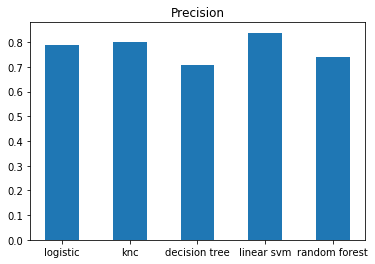

In [185]:
labels = ['logistic','knc','decision tree','linear svm','random forest']
yy = [prec_log,prec_knc,prec_dtree,prec_svc,prec_forest]
# xx = [1,2]
# plt.xticks(xx,labels)
plt.title('Precision')
plt.bar(labels,yy,width=0.5)

<BarContainer object of 5 artists>

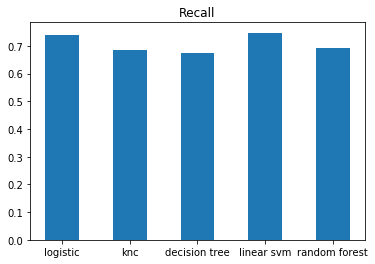

In [186]:
labels = ['logistic','knc','decision tree','linear svm','random forest']
yy = [rec_log,rec_knc,rec_dtree,rec_svc,rec_forest]
# xx = [1,2]
# plt.xticks(xx,labels)
plt.title('Recall')
plt.bar(labels,yy,width=0.5)

<BarContainer object of 5 artists>

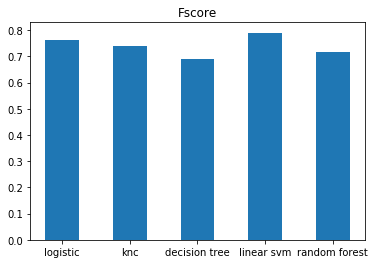

In [187]:
labels = ['logistic','knc','decision tree','linear svm','random forest']
yy = [fscore_log,fscore_knc,fscore_dtree,fscore_svc,fscore_forest]
# xx = [1,2]
# plt.xticks(xx,labels)
plt.title('Fscore')
plt.bar(labels,yy,width=0.5)

#### check this link for info on precision, recall, f1score...  
#### https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c